In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
plt.style.use(["science", "notebook", "grid"])
from matplotlib.animation import FuncAnimation

$$
\ddot{\theta}_1 = \frac{k}{m}\theta_2 - (\frac{g}{l} + \frac{k}{m})\theta_1 \\
$$
$$
\ddot{\theta}_2 = \frac{k}{m}\theta_1 - (\frac{g}{l} + \frac{k}{m})\theta_2 
$$

$$
S = \Big(\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2 \Big)
$$

### Constants

In [2]:
k = 2 # In N/m
m = 2 # In kg
g = 9.8 # In m/s2
l = 2 # In m
alpha = 2 # In m

In [3]:
def dSdt(S, t):
    theta1, dtheta1, theta2, dtheta2 = S

    return [
        dtheta1,
        (k/m) * theta2 - ((g/l) + (k/m)) * theta1,
        dtheta2,
        (k/m) * theta1 - ((g/l) + (k/m)) * theta2
    ]

y0 = (np.pi/6, 4, 0, 0.2)
t = np.linspace(0, 100, 10000)

In [4]:
sols = odeint(func=dSdt, y0 = y0, t = t)

In [5]:
theta1 = sols.T[0]
theta2 = sols.T[2]

In [6]:
def get_pts(theta1 : np.array, theta2 : np.array, l : float, alpha : float) -> np.array:
    """Calculate x, y points of coupled oscillator
    
    Args:
    theta1 (array) : angular position of first oscillator
    theta2 (array) : angular positin of second oscillator
    l (float) : length of strings of the oscillators
    alpha (float) : absolute distance between the hanging points of the oscillators in their 
                    undisturbed state.

    Returns:
    x1 (array) : x coordinate of first oscillator
    y1 (array) : y coordinate of first oscillator
    x2 (array) : x coordinate of second oscillator
    y2 (array) : y coordinate of second oscillator"""

    x1 = l * np.sin(theta1)
    x2 = alpha + l * np.sin(theta2)

    y1 = -l * np.cos(theta1) 
    y2 = -l * np.cos(theta2)

    return (x1, y1, x2, y2)

In [7]:
x1, y1, x2, y2 = get_pts(theta1 = theta1, theta2 = theta2, l=l, alpha = alpha)

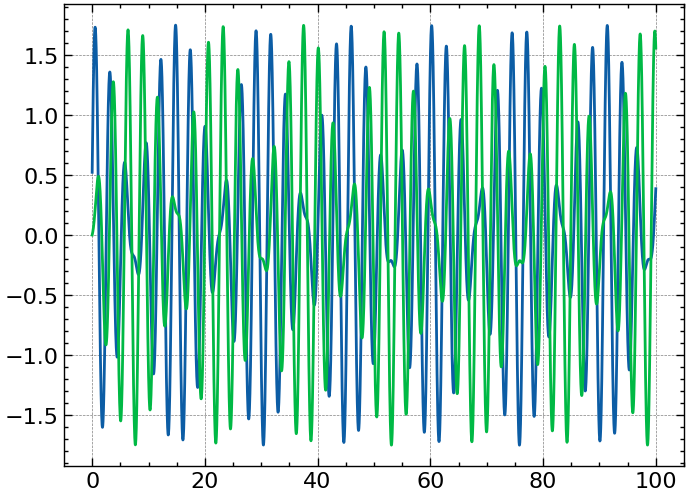

In [11]:
plt.plot(t, theta1)
plt.plot(t, theta2)

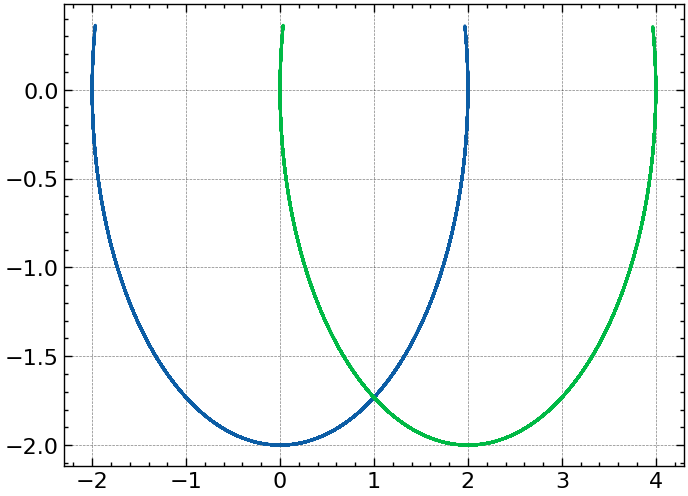

In [8]:
plt.plot(x1, y1)
plt.plot(x2, y2)

In [8]:
oscc1_hanging_pt = (0, 0)
oscc2_hanging_pt = (alpha, 0)

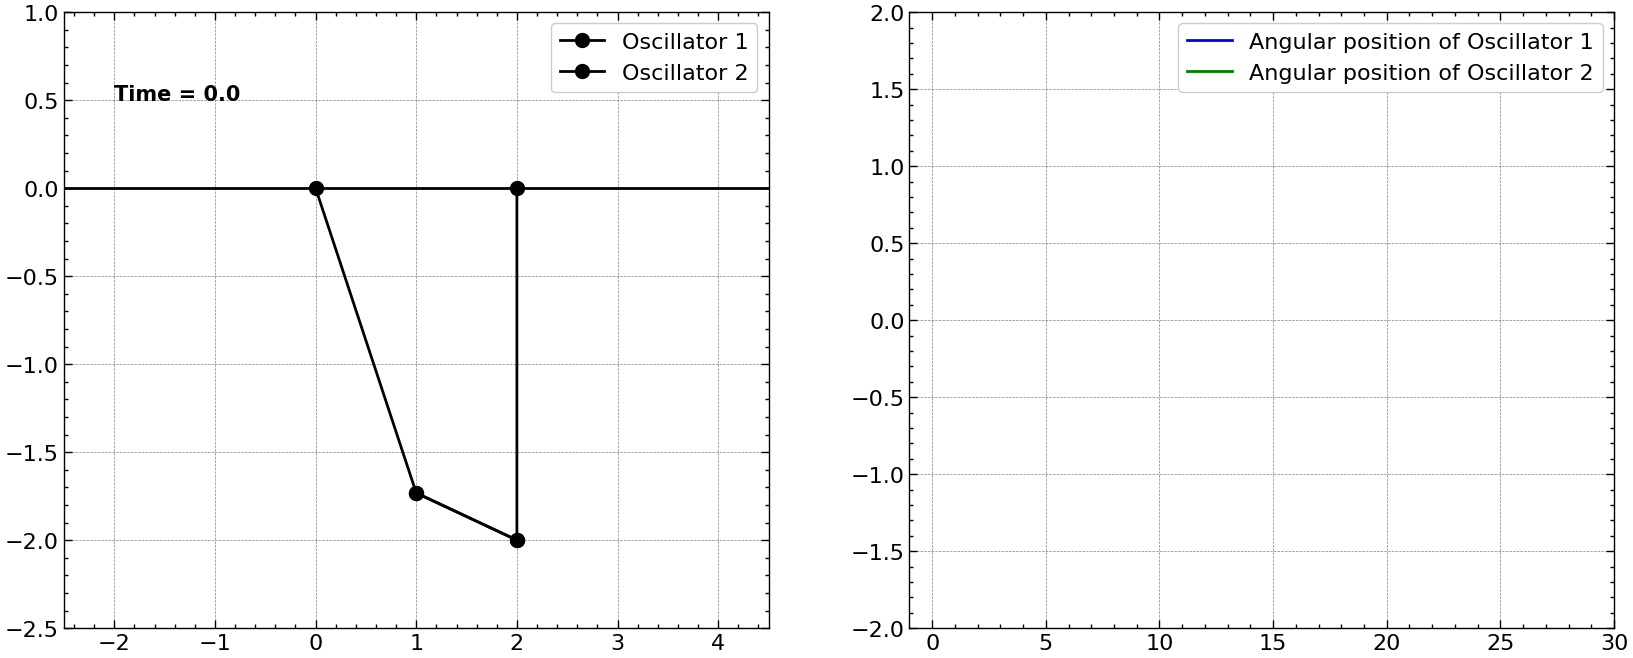

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax1, ax2 = ax.ravel()

ax1.set_xlim(-2.5, 4.5)
ax1.set_ylim(-2.5, 1)

ax2.set_xlim(-1, 30)
ax2.set_ylim(-2, 2)

line1, = ax1.plot([], [], "o-", color = "black", 
            markersize = 10, markerfacecolor = "black", label = "Oscillator 1")
line2, = ax1.plot([], [], "o-", color = "black", 
            markersize = 10, markerfacecolor = "black", label = "Oscillator 2")

line3,  = ax2.plot([], [], "-", color = "blue", 
             label = "Angular position of Oscillator 1")

line4,  = ax2.plot([], [], "-", color = "green", 
             label = "Angular position of Oscillator 2")

ax1.axhline(y = 0, color = "black")

text = ax1.text(-2, 0.5, [], fontsize = 15, fontweight = "bold")

def animate(frame):
    line1.set_data([oscc1_hanging_pt[0], x1[frame], x2[frame]], 
                    [oscc1_hanging_pt[1], y1[frame],
                    y2[frame]])
    line2.set_data([oscc2_hanging_pt[0], x2[frame], x1[frame]], 
                    [oscc2_hanging_pt[1], y2[frame], y1[frame]])

    line3.set_data(t[:frame], theta1[:frame])
    line4.set_data(t[:frame], theta2[:frame])

    
    text.set_text(f"Time = {t[frame]}")
    return line1, line2, line3, line4
    
anim = FuncAnimation(fig = fig, func=animate, frames = 3000, interval = 30)
anim.save("Coupled_oscc.gif", writer="pillow")

ax1.legend()
ax2.legend()